# In this model we are going to predict the "Death" due to covid19 in USA from the given dataset

# Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
import warnings
warnings.simplefilter("ignore")

# Loading the Dataset

In [4]:
a = pd.read_csv("Covid19_USA.csv")
a.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


# Exploratory Data Analysis

In [5]:
a.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [6]:
a.shape

(58, 18)

In [7]:
a.count()

Province_State          58
Country_Region          58
Last_Update             58
Lat                     56
Long_                   56
Confirmed               58
Deaths                  58
Recovered               42
Active                  58
FIPS                    58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
UID                     58
ISO3                    58
Testing_Rate            56
Hospitalization_Rate    33
dtype: int64

In [8]:
a.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [9]:
a

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


a.info

In [10]:
a.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Here we can observe that std is higher than mean most of the columns
hence the data dispersion is high for all these columns so the presence of outliers are rare.

Mean is higher than the median in most of the columns hence there is a slighter chance for skewness to be present.

Huge difference between 75th percentile and maximum value in most of the columns
it firmly confirms that outliers are present in the dataset. 

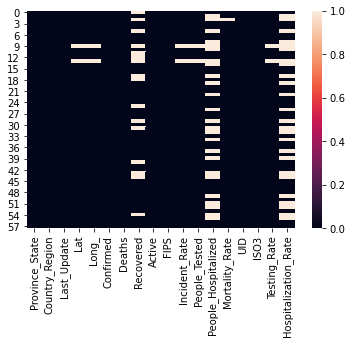

In [11]:
sns.heatmap(a.isnull())

In [25]:
b = a.fillna(0)

Replaced all the null values to 0

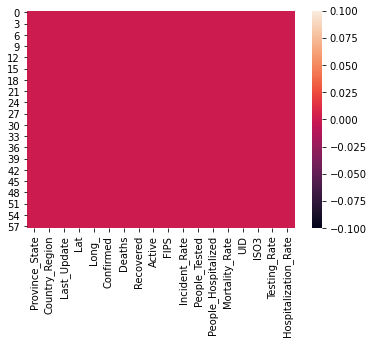

In [26]:
sns.heatmap(b.isnull())

In [27]:
b.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,35.569741,-82.268455,26756.086207,1611.017241,5074.344828,20070.724138,3288.086207,382.567674,2.180654e+05,2786.482759,4.381382,7.676194e+07,3759.904564,8.160412
std,12.662834,51.328392,52562.031122,4084.750891,10393.125384,41294.705318,17408.350591,402.221849,2.964241e+05,10177.988015,2.195667,2.378302e+07,2029.719694,8.101621
min,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.600000e+01,0.000000,0.000000
25%,33.761575,-99.697700,2596.000000,74.000000,0.000000,812.500000,18.250000,139.910412,4.166725e+04,0.000000,2.952622,8.400001e+07,2649.226598,0.000000
50%,38.978600,-86.797300,10148.500000,385.000000,1079.500000,5644.500000,32.500000,244.809981,1.334500e+05,178.500000,4.382399,8.400003e+07,3440.890063,8.403869
75%,42.214075,-75.830850,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,462.828082,2.620348e+05,1722.750000,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [28]:
target = b.Deaths            #renaming the Deaths as target
target

0       522
1        10
2         0
3       747
4       107
5      3497
6      1299
7      3529
8       310
9         0
10      407
11     2096
12     1697
13        3
14        5
15       17
16       77
17     4525
18     1864
19      393
20      202
21      376
22     2608
23       73
24     2123
25     6066
26     5060
27      786
28      570
29      640
30       16
31      138
32      377
33      190
34    10749
35      283
36    28636
37      726
38       49
39        2
40     1781
41      299
42      144
43     4770
44      125
45      538
46      407
47       46
48      305
49     1426
50       90
51       54
52        6
53     1075
54     1037
55       69
56      481
57       11
Name: Deaths, dtype: int64

In [29]:
b.drop(['Deaths'], axis = 1, inplace = True)
b

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,0.0,82500.0,6,217.646575,1380120.0,0.0,4.066421,84000006,USA,3492.893832,0.000000
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,3965.0,3919.0,10,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976,0.000000
9,Diamond Princess,US,2020-05-21 02:32:54,0.0000,0.0000,49,0.0,49.0,88888,0.000000,0.0,0.0,0.000000,84088888,USA,0.000000,0.000000


In [30]:
c = b

In [31]:
c['target'] = target       # adding the target value in the dataset again
c                      

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,target
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,522
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000,10
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000,0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,747
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,107
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,0.0,82500.0,6,217.646575,1380120.0,0.0,4.066421,84000006,USA,3492.893832,0.000000,3497
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774,1299
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438,3529
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,3965.0,3919.0,10,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976,0.000000,310
9,Diamond Princess,US,2020-05-21 02:32:54,0.0000,0.0000,49,0.0,49.0,88888,0.000000,0.0,0.0,0.000000,84088888,USA,0.000000,0.000000,0


In [32]:
c.shape

(58, 18)

In [33]:
c.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
target                    int64
dtype: object

In [34]:
#separating categorical values to replace with numerical value


c_cat = c[['Province_State', 'Country_Region','Last_Update',
                       'ISO3']].copy()
c_cat.head()

,Province_State,Country_Region,Last_Update,ISO3
0,Alabama,US,2020-05-21 02:32:54,USA
1,Alaska,US,2020-05-21 02:32:54,USA
2,American Samoa,US,2020-05-21 02:32:54,ASM
3,Arizona,US,2020-05-21 02:32:54,USA
4,Arkansas,US,2020-05-21 02:32:54,USA


In [35]:
c_cat = pd.get_dummies(c_cat)
c_cat.head()

,Province_State_Alabama,Province_State_Alaska,Province_State_American Samoa,Province_State_Arizona,Province_State_Arkansas,Province_State_California,Province_State_Colorado,Province_State_Connecticut,Province_State_Delaware,Province_State_Diamond Princess,...,Province_State_Wisconsin,Province_State_Wyoming,Country_Region_US,Last_Update_2020-05-21 02:32:54,ISO3_ASM,ISO3_GUM,ISO3_MNP,ISO3_PRI,ISO3_USA,ISO3_VIR
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [37]:
c_num = c[['Lat', 'Long_', 'Confirmed','Recovered','Active','FIPS','Incident_Rate',
           'People_Tested','People_Hospitalized',
           'Mortality_Rate','UID','Testing_Rate','Hospitalization_Rate','target']].copy()
c_num.head()

,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,target
0,32.3182,-86.9023,13052,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,3353.942386,11.438860,522
1,61.3707,-152.4044,401,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,5063.940017,0.000000,10
2,-14.2710,-170.1320,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,222.857246,0.000000,0
3,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,2272.859351,12.022005,747
4,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3189.670370,10.693584,107


In [38]:
d = pd.concat([c_num, c_cat], axis=1)
d.head()

,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,...,Province_State_Wisconsin,Province_State_Wyoming,Country_Region_US,Last_Update_2020-05-21 02:32:54,ISO3_ASM,ISO3_GUM,ISO3_MNP,ISO3_PRI,ISO3_USA,ISO3_VIR
0,32.3182,-86.9023,13052,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,...,0,0,1,1,0,0,0,0,1,0
1,61.3707,-152.4044,401,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,...,0,0,1,1,0,0,0,0,1,0
2,-14.2710,-170.1320,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,...,0,0,1,1,1,0,0,0,0,0
3,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,...,0,0,1,1,0,0,0,0,1,0
4,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,...,0,0,1,1,0,0,0,0,1,0


In [39]:
d.dtypes

Lat          float64
Long_        float64
Confirmed      int64
Recovered    float64
Active       float64
              ...   
ISO3_GUM       uint8
ISO3_MNP       uint8
ISO3_PRI       uint8
ISO3_USA       uint8
ISO3_VIR       uint8
Length: 80, dtype: object

# Machine Learning Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [44]:
target_final = c['target']
features = d.drop('target', axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, target_final, test_size=0.4, random_state=10)

In [46]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
pred = model.predict(X_test)

In [48]:
accuracy_score(y_test, pred)            # we got 41% accuracy score in the prediction phase

0.041666666666666664

In [ ]:
Hence we have build the machine learning model using Random Forest Classifier technique to predict 
the Attrition rate of the employees in a company